# Prinicipal Component Analysis of factors associated with higher incidences of Covid19 in U.S. States.

Here I aggregrate lots of different data sources about U.S. States. I then perform a Prinicipal Component Analysis to identify the axes of greatest variance amongst the States before overlaying a visualisation of which States had highest incidence of Covid19 (this was performed earlier on in the pandemic.)

In [2]:
## package easyCODA needs to be installed
## required packages will be installed automatically
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("ca")
install.packages("easyCODA", dependencies=TRUE)

library(ggplot2)
library("gridExtra")
library("ca")

also installing the dependencies ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘testthat’, ‘isoband’

Warning message in install.packages("ggplot2"):
“installation of package ‘testthat’ had non-zero exit status”Warning message in install.packages("ggplot2"):
“installation of package ‘isoband’ had non-zero exit status”Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


In [224]:
# Read States dataset
states <- read.csv("/Users/chloemaine/Documents/Chloe/BGSE/data_vis_t2/lockhart/covid-19-data/us_states.csv", header=TRUE)

# head(states)
cases <- states$decile_cases
deaths <- states$decile_deaths
state_quals <- subset(states, select = c(4:5,8,9, 11,12,13, 14,15,16))
state_names <- states$state
head(state_quals)

int_passengers,medicaid_spend,medicaid_enrollees,EP_PCI,poverty,unemployment,over65,excess_deaths,xborder_passengers,xborder_trucks
2158,17326764280,12251651,25299.09,829400,147898,783832,2950809,0,0
31949,6321690187,2359848,35078.54,77865,28067,78428,190624,0,0
1152789,39668909835,22682953,29597.31,1092192,210214,1158320,1290632,2581051,81884
207,22352868462,11066409,24735.87,510337,75774,487536,1734843,5786,1702
21904532,315897913352,156115836,35750.06,5487141,1321502,5315457,4505186,8682896,221559
1575992,28754731745,15602571,36153.61,590504,139326,740638,578224,0,0


In [204]:
# sapply(states, class)
head(states)

fips,cases,deaths,int_passengers,medicaid_spend,state,FDL_medicaid_elig,medicaid_enrollees,EP_PCI,tot_pop,poverty,unemployment,over65,excess_deaths,xborder_passengers,xborder_trucks,decile_cases,decile_deaths
858199,0.002399952,3.782366e-05,4.436057e-04,3561.748,Alabama,500%,2.518491,25299.09,4864680,0.1704943,0.03040241,0.1611271,0.6065782,0.000000000,0.0000000000,2,2
238131,0.001986416,2.572727e-05,4.326108e-02,8559.991,Alaska,133%,3.195392,35078.54,738516,0.1054344,0.03800459,0.1061968,0.2581176,0.000000000,0.0000000000,1,1
1204364,0.001967269,3.339722e-05,1.659481e-01,5710.481,Arizona,133%,3.265292,29597.31,6946685,0.1572249,0.03026105,0.1667443,0.1857911,0.371551467,0.0117874929,1,1
3886436,0.002430893,3.444043e-05,6.921524e-05,7474.198,Arkansas,133%,3.700310,24735.87,2990671,0.1706430,0.02533679,0.1630189,0.5800849,0.001934683,0.0005691031,2,1
8134152,0.002630198,5.542960e-05,5.595205e-01,8069.168,California,133%,3.987759,35750.06,39148760,0.1401613,0.03375591,0.1357759,0.1150786,0.221792363,0.0056594130,2,3
6778543,0.006231806,1.357767e-04,2.849307e-01,5198.698,Colorado,133%,2.820859,36153.61,5531141,0.1067599,0.02518938,0.1339033,0.1045397,0.000000000,0.0000000000,4,4


In [141]:
state_names

[1] Alabama              Alaska               Arizona             
 [4] Arkansas             California           Colorado            
 [7] Connecticut          Delaware             District of Columbia
[10] Florida              Georgia              Hawaii              
[13] Idaho                Illinois             Indiana             
[16] Iowa                 Kansas               Kentucky            
[19] Louisiana            Maine                Maryland            
[22] Massachusetts        Michigan             Minnesota           
[25] Mississippi          Missouri             Montana             
[28] Nebraska             Nevada               New Hampshire       
[31] New Jersey           New Mexico           New York            
[34] North Carolina       North Dakota         Ohio                
[37] Oklahoma             Oregon               Pennsylvania        
[40] Rhode Island         South Carolina       South Dakota        
[43] Tennessee            Texas                Utah                
[46] Vermont              Virginia             Washington          
[49] West Virginia        Wisconsin            Wyoming             
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [142]:
state_codes <- c('ALAB', 'ALA', 'ARZ', 'ARK','CAL', 'COL', 'CON', 'DEL', 'DOC', 'FLO', 'GEO', 'HAI', 'IDA', 'ILL', 'IND',
               'IOW', 'KAN', 'KEN', 'LOU', 'MAI', 'MAR', 'MAS', 'MIC', 'MIN', 'MISIP', 'MISOU', 'MON', 'NEB',
               'NEV', 'NHA', 'NJE', 'NMX','NY', 'NCA', 'NDA', 'OHI', 'OKL', 'ORE', 'PEN', 'RIS', 'SCA', 'SDA',
               'TEN', 'TEX', 'UTA', 'VER', 'VIR', 'WAS', 'WVIR', 'WIS', 'WYO')

In [189]:
states

fips,cases,deaths,int_passengers,medicaid_spend,state,FDL_medicaid_elig,medicaid_enrollees,EP_PCI,tot_pop,poverty,unemployment,over65,excess_deaths,xborder_passengers,xborder_trucks,decile_cases,decile_deaths
858199,0.0023999523,3.782366e-05,4.436057e-04,3561.748,Alabama,500%,2.518491,25299.09,4864680,0.17049426,0.03040241,0.1611271,0.60657823,0.000000000,0.0000000000,2,2
238131,0.0019864160,2.572727e-05,4.326108e-02,8559.991,Alaska,133%,3.195392,35078.54,738516,0.10543441,0.03800459,0.1061968,0.25811763,0.000000000,0.0000000000,1,1
1204364,0.0019672693,3.339722e-05,1.659481e-01,5710.481,Arizona,133%,3.265292,29597.31,6946685,0.15722492,0.03026105,0.1667443,0.18579106,0.371551467,0.0117874929,1,1
3886436,0.0024308926,3.444043e-05,6.921524e-05,7474.198,Arkansas,133%,3.700310,24735.87,2990671,0.17064298,0.02533679,0.1630189,0.58008487,0.001934683,0.0005691031,2,1
8134152,0.0026301982,5.542960e-05,5.595205e-01,8069.168,California,133%,3.987759,35750.06,39148760,0.14016130,0.03375591,0.1357759,0.11507864,0.221792363,0.0056594130,2,3
6778543,0.0062318064,1.357767e-04,2.849307e-01,5198.698,Colorado,133%,2.820859,36153.61,5531141,0.10675989,0.02518938,0.1339033,0.10453973,0.000000000,0.0000000000,4,4
1477190,0.0089844937,2.169480e-04,2.058967e-02,7506.339,Connecticut,133%,3.092709,42623.77,3581504,0.09729125,0.03515534,0.1640596,0.11520104,0.000000000,0.0000000000,4,4
620188,0.0038873296,8.636170e-05,0.000000e+00,7248.992,Delaware,133%,2.664262,34831.24,949495,0.11563831,0.03001701,0.1760188,0.30500424,0.000000000,0.0000000000,3,3
319029,NA,NA,NA,NA,District of Columbia,210%,NA,31291.07,NA,NA,NA,NA,NA,NA,NA,NA,NA
13034575,0.0036005194,5.320869e-05,9.608795e-01,3315.839,Florida,500%,2.282744,31413.54,20598139,0.14486022,0.03024438,0.1973176,0.25572427,0.000000000,0.0000000000,3,3


In [225]:
### Q1: standardize the variables
state_quals.st <- scale(state_quals)

### SVD of standardized matrix 
### (convenient to rescale by dividing by square roots of
###  number of cells in the table)
state_quals.svd <- svd(state_quals.st /sqrt(nrow(state_quals)*ncol(state_quals)))

### row principal and column standard coordinates 
state_quals.rpc <- state_quals.svd$u %*% diag(state_quals.svd$d)
state_quals.csc <- state_quals.svd$v

### Q2 variance explained by dimensions (%)
state_quals.pct <- 100 * state_quals.svd$d^2 / sum(state_quals.svd$d^2)
round(state_quals.pct,1)

[1] 71.7 12.4  9.0  3.4  2.0  1.0  0.2  0.1  0.1  0.0

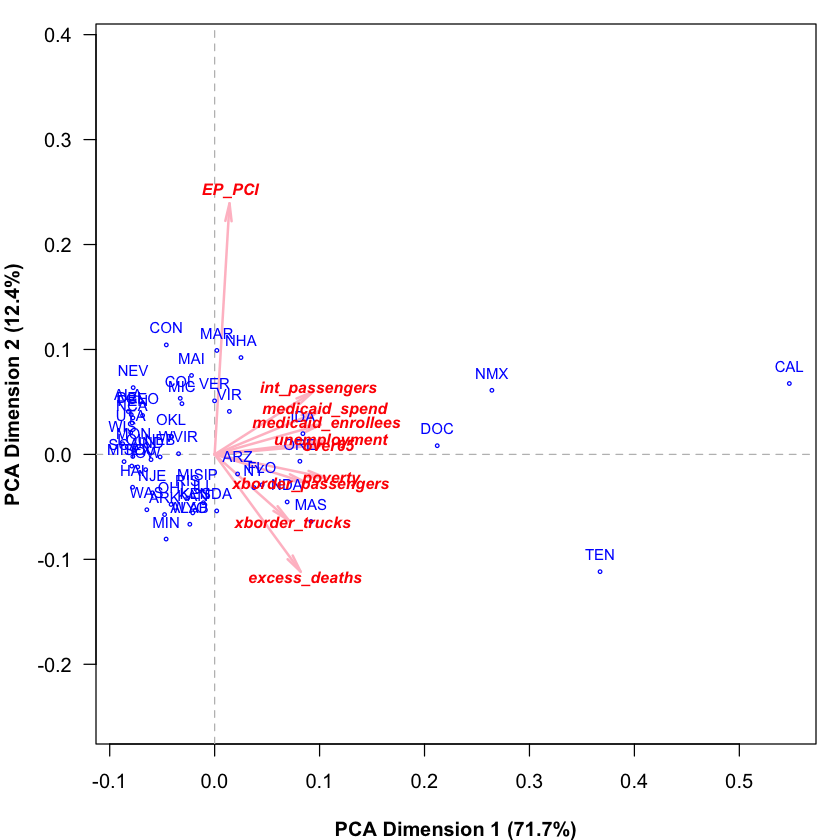

In [226]:
### Q3 plot the two sets of coordinates any way you like
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.3

plot(rbind(state_quals.rpc,rescale*state_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(state_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(state_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)

arrows(0, 0, 0.95*rescale*state_quals.csc[,1], 0.95*rescale*state_quals.csc[,2], 
       length=0.15, angle=10, col="pink", lwd=2)

points(state_quals.rpc,  col="blue", font=1, cex=0.4)
text(state_quals.rpc, col= "blue", labels=state_codes, cex= 0.75, pos=3)

text(rescale*state_quals.csc, labels=colnames(state_quals), col="red", font=4, cex=0.8)

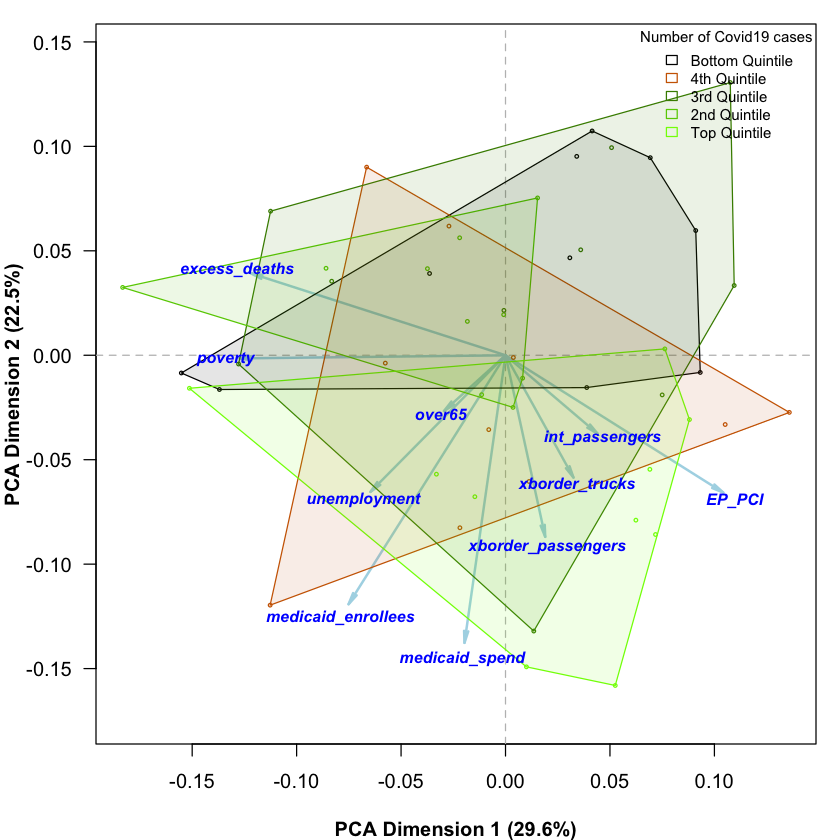

In [221]:
### Q5 plot the two sets of coordinates any way you like
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.25

plot(rbind(state_quals.rpc,rescale*state_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(state_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(state_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)


arrows(0, 0, 0.95*rescale*state_quals.csc[,1], 0.95*rescale*state_quals.csc[,2], 
       length=0.1, angle=10, col="light blue", lwd=2)


col.quals <- c("black", "darkorange3", "chartreuse4", "chartreuse3", "chartreuse1")

points(state_quals.rpc,  col=col.quals[cases+1], font=1, cex=0.4)
# text(state_quals.rpc, col=col.quals[cases], labels=state_codes, cex= 0.5, pos=3)

### convex hulls around groups of same quality
for(g in 0:4) {
  coords <- state_quals.rpc[cases == g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  lines(coords[hpts,], col=col.quals[g+1])
}  

### shading in convex hulls 
for(g in 0:4) {
  coords <- state_quals.rpc[cases==g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  polygon(coords[hpts,], col=adjustcolor(col.quals[g+1], alpha.f=0.1), border=NA)
}

text(rescale*state_quals.csc, labels=colnames(state_quals), col="blue", font=4, cex=0.8)

op <- par(cex = 0.75)
legend("topright", legend=c("Bottom Quintile", "4th Quintile", "3rd Quintile", "2nd Quintile", "Top Quintile"), border = col.quals, fill=col.quals,
           density=0.5, bty="n", title= "Number of Covid19 cases") 

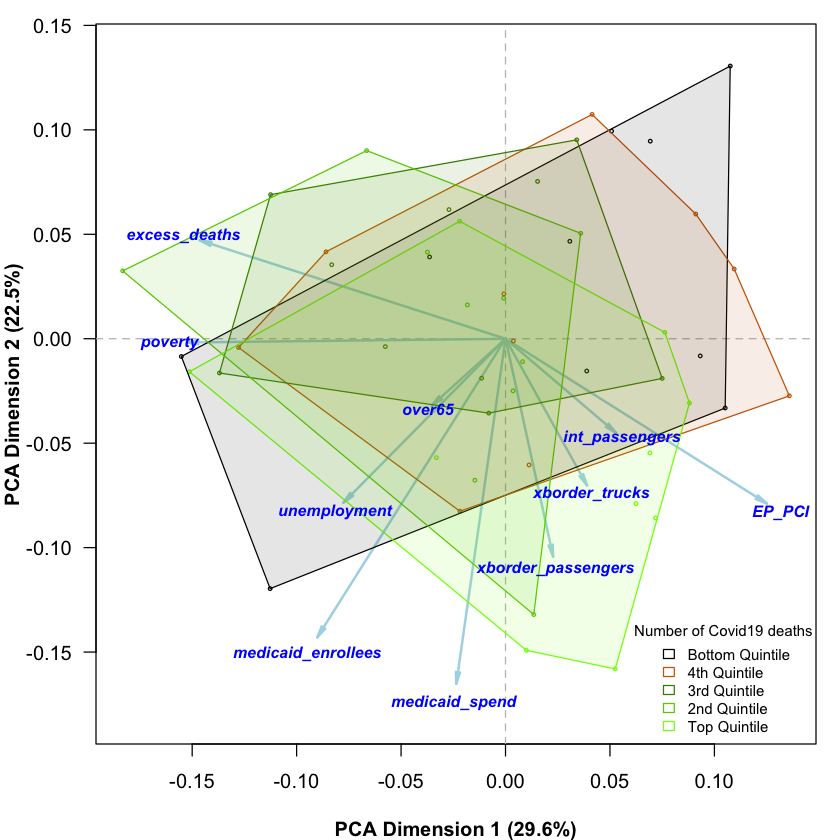

In [223]:
### Q5 plot the two sets of coordinates any way you like
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.3

plot(rbind(state_quals.rpc,rescale*state_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(state_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(state_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)


arrows(0, 0, 0.95*rescale*state_quals.csc[,1], 0.95*rescale*state_quals.csc[,2], 
       length=0.1, angle=10, col="light blue", lwd=2)


col.quals <- c("black", "darkorange3", "chartreuse4", "chartreuse3", "chartreuse1")

points(state_quals.rpc,  col=col.quals[deaths+1], font=1, cex=0.4)

### convex hulls around groups of same quality
for(g in 0:4) {
  coords <- state_quals.rpc[deaths == g, 1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  lines(coords[hpts,], col=col.quals[g+1])
}  

### shading in convex hulls 
for(g in 0:4) {
  coords <- state_quals.rpc[deaths==g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  polygon(coords[hpts,], col=adjustcolor(col.quals[g+1], alpha.f=0.1), border=NA)
}

text(rescale*state_quals.csc, labels=colnames(state_quals), col="blue", font=4, cex=0.8)

op <- par(cex = 0.75)
legend("bottomright", legend=c("Bottom Quintile", "4th Quintile", "3rd Quintile", "2nd Quintile", "Top Quintile"), border = col.quals, fill=col.quals,
           density=0.5, bty="n", title= "Number of Covid19 deaths") 